In [400]:
library(forecast)
library(mgcv)

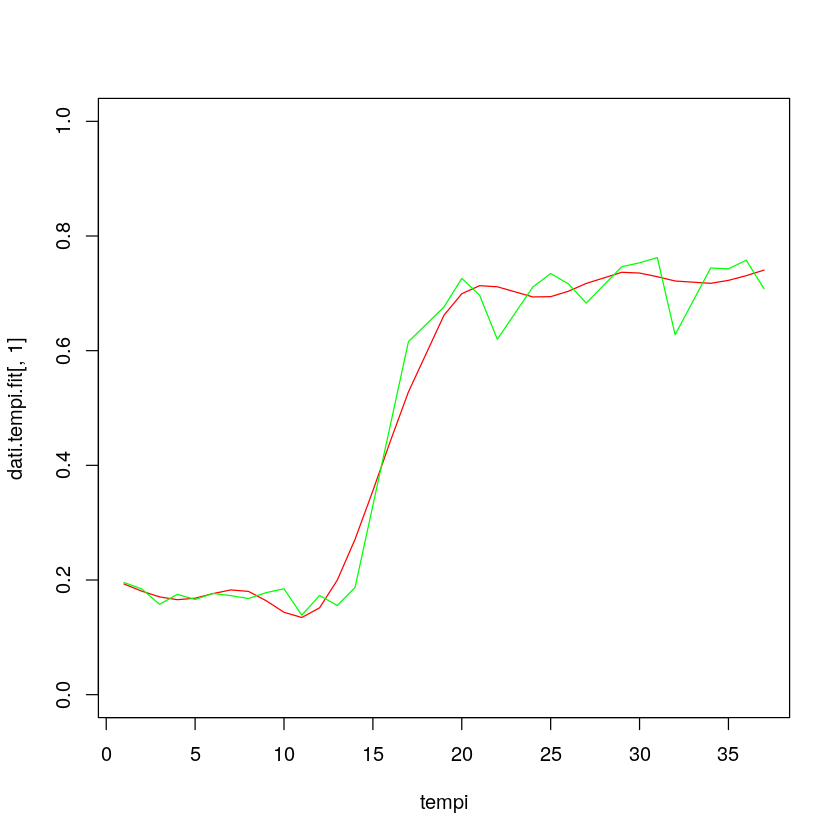

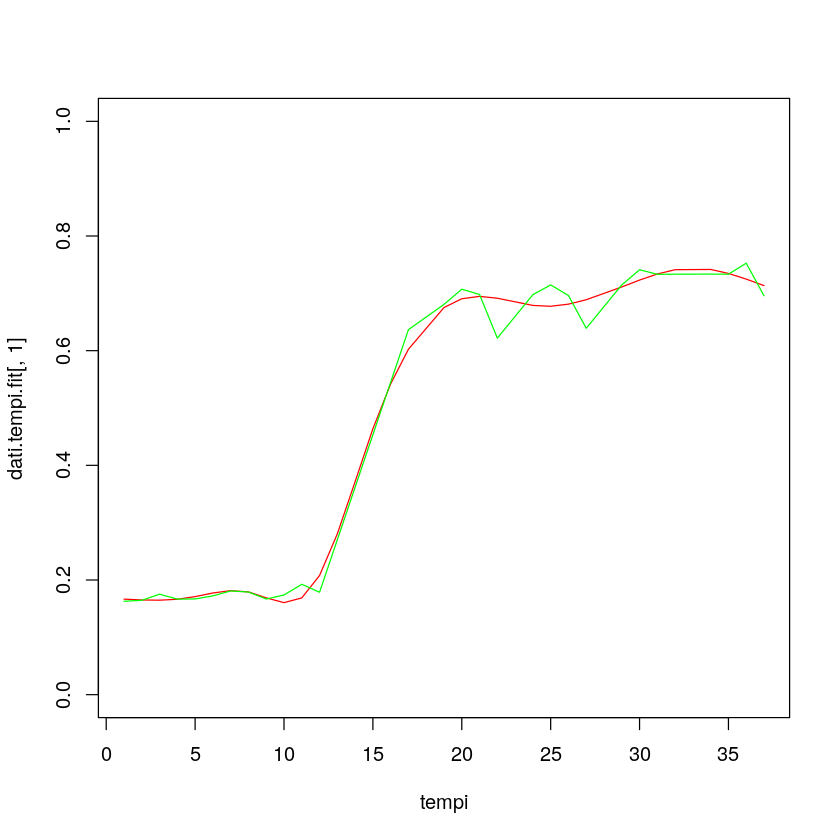

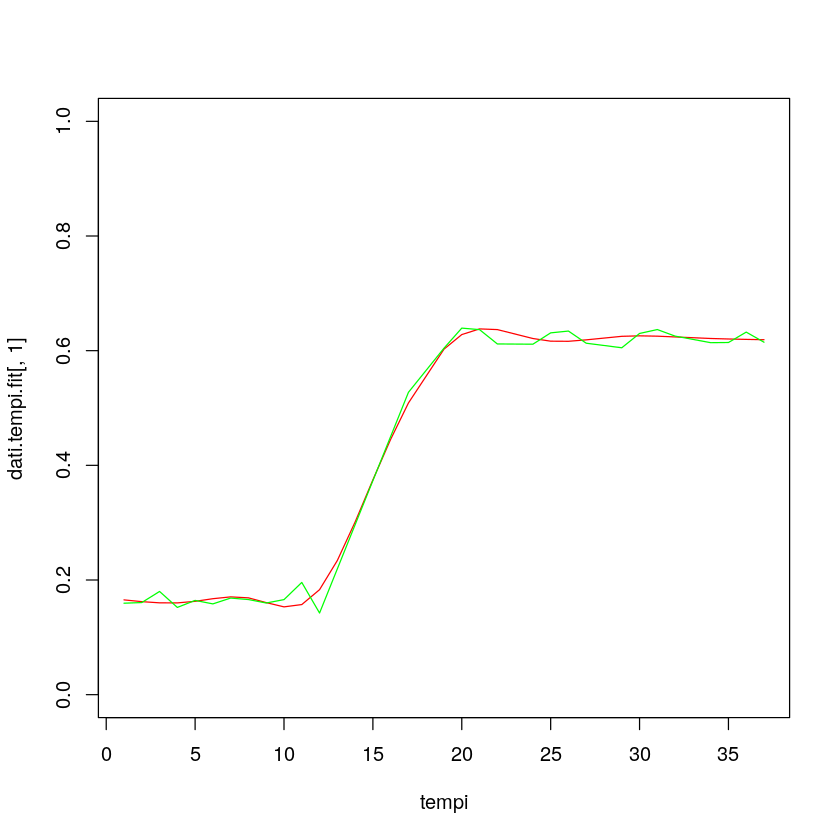

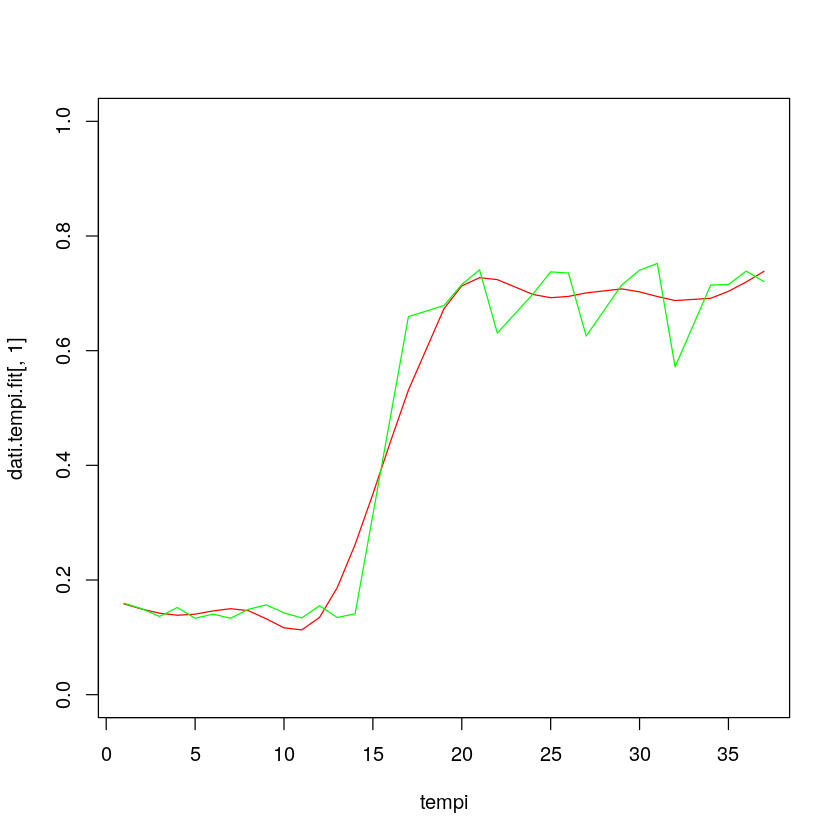

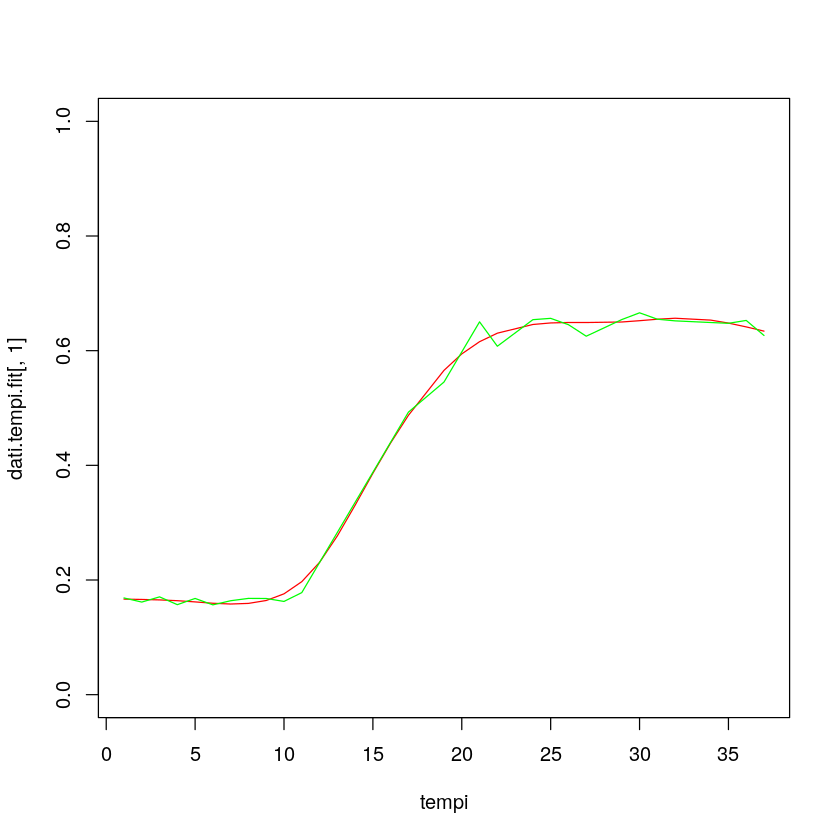

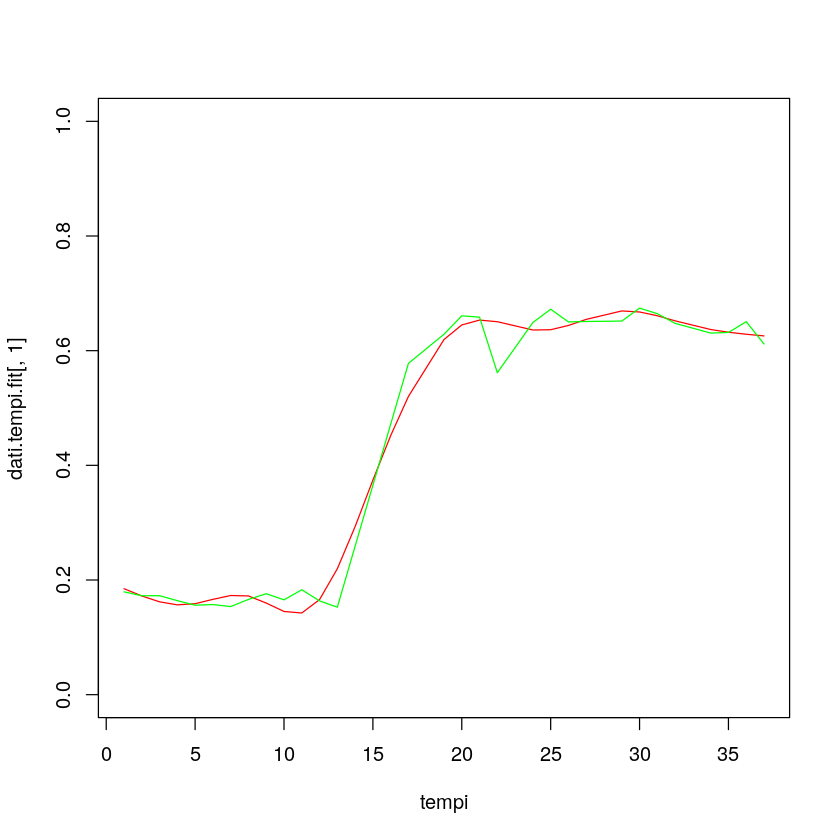

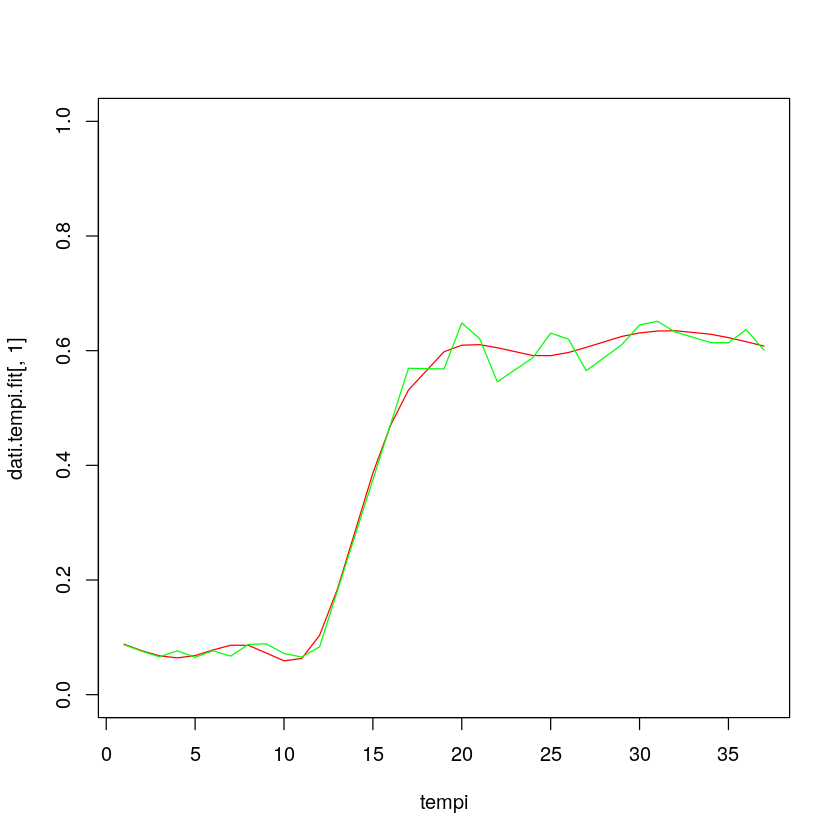

In [812]:
for(i in 1:54) {
file <- paste("./olives/Mean/x", i,"_mean.txt", sep = "")
#v <- c(0.195621657754011,0.184402852049911,0.157620320855615,0.174933155080214,0.166120766488414,0.176559714795009,0.172805258467023,0.167669340463458,0.177985739750446,0.184714795008913,0.138569518716578,0.173005793226381,0.155514705882353,0.187254901960784,0.179177807486631,0.675523618538324,0.615753119429590,0.373273172905526,0.676247771836007,0.725991532976827,0.696836007130125,0.619897504456328,0.266165329768271,0.711096256684492,0.734514260249555,0.716443850267380,0.682943404634581,0.307921122994652,0.746457219251337,0.753264260249554,0.762355169340463,0.627785204991087,0.369362745098039,0.744151069518717,0.742713903743316,0.757742869875223,0.708065953654189,0.546446078431373,0.353721033868093)
getwd()
v <- read.csv(file, header = FALSE)
length(colnames(v))
tempi <- c(1:17,19:22,24:27,29:32,34:37)
#print(tempi)
r <- v[tempi,1:length(colnames(v))]
#print(r)
#print(length(tempi))
    
#plot(r[,1])
    
clean2 <- function(x){ tsclean(x, replace.missing = FALSE, lambda = NULL) } #funzione tsclean di forecast
    
#tempi <- 1:39
dati <- sapply(r, FUN = clean2)
d <- data.frame(dati)
    
#f1 <- function(x) { return(predict(gam(as.vector(x) ~ s(tempi, bs = c("cs"), k = -1),na.action = na.exclude),data.frame(tempi = seq(1, max(tempi), 1), se = FALSE))) }
f1 <- function(x) { return(predict(gam(as.vector(x) ~ s(tempi, bs = c("cs"), k = -1),na.action = na.exclude),data.frame(tempi))) }
    
dati.tempi.fit <- apply( d, MARGIN = 2, f1)
    
plot(tempi, dati.tempi.fit[,1],type="l",col="red", ylim=c(0,1.0))
lines(tempi,dati[,1],col="green", ylim=c(0,1))
filew <- paste("./olives/Mean/x", i, "_mean_filtered.csv", sep = "")
write.csv(data.frame(tempi,dati.tempi.fit),filew, row.names = FALSE)
}